In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
iris=datasets.load_iris()
X=iris.data
y=iris.target.copy()

In [8]:
y[y!=0]=1

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=666)

lin_reg=LogisticRegression()
lin_reg.fit(X_train,y_train)
y_predict=lin_reg.predict(X_test)
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0])

## 改变分类阈值

**decision_function(返回每一个样本的置信度分数)** 

In [13]:
decision_scores=lin_reg.decision_function(X_test)
decision_scores

array([ 4.45004574,  6.76338764,  1.71975478,  6.42017596, -3.6749602 ,
        3.55961483,  4.48991192,  6.81237857,  4.96543161,  4.25577917,
        4.59455309, -3.42201691, -3.36393292, -3.36561758,  9.02493463,
        3.50227991, -5.15651838,  8.5392004 ,  6.96164517,  7.13780001,
        5.05770616, -3.72638272, 11.62643283, -3.86098672,  4.21706614,
        3.9470265 , -4.21104853,  3.72132247,  8.62197566,  9.57935503,
       -3.97490962, -3.66620999,  3.62808065,  7.03096401,  1.04427153,
        5.30342692,  7.29760757, 10.43923317, -4.28160309,  5.38358471,
        9.47592004,  7.07278331,  4.4025825 ,  3.12390827, -3.77780524])

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_scores=[]
recall_scores=[]
thresholds=np.sort(decision_scores)
for threshlod in thresholds:
    y_predict=np.array(decision_scores>=threshlod,dtype='int')
    precision=precision_score(y_test,y_predict)
    recall=recall_score(y_test,y_predict)
    precision_scores.append(precision)
    recall_scores.append(recall)

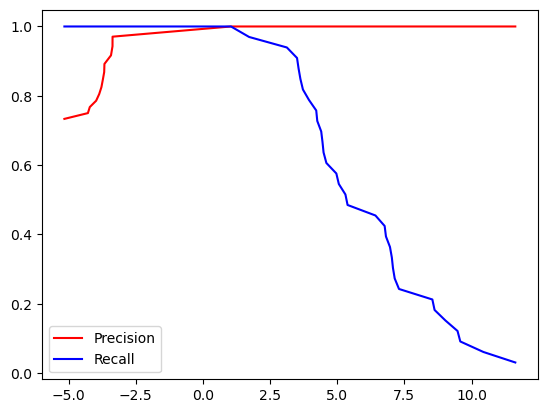

In [21]:
plt.plot(thresholds,precision_scores,c='r',label="Precision")
plt.plot(thresholds,recall_scores,c='b',label="Recall")
plt.legend()
plt.show()

# Pression-Recall曲线（P作纵轴，R作横轴）

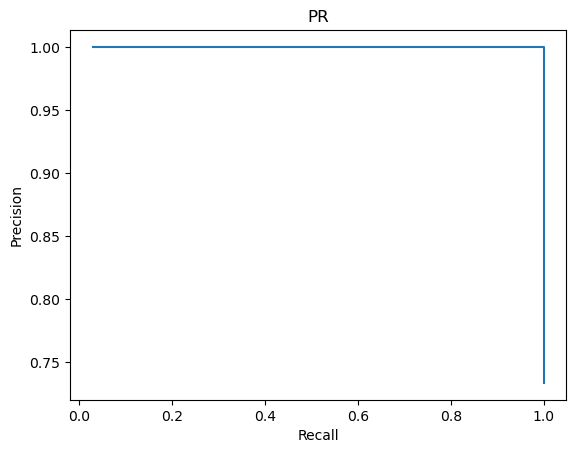

In [25]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR")
plt.show()

## scikit-learn中的PR曲线

In [29]:
from  sklearn.metrics import precision_recall_curve
precision_scores,recall_scores,thresholds=precision_recall_curve(y_test,decision_scores)

### 该方法precision与recall值比上面多一个所以最后一个不取

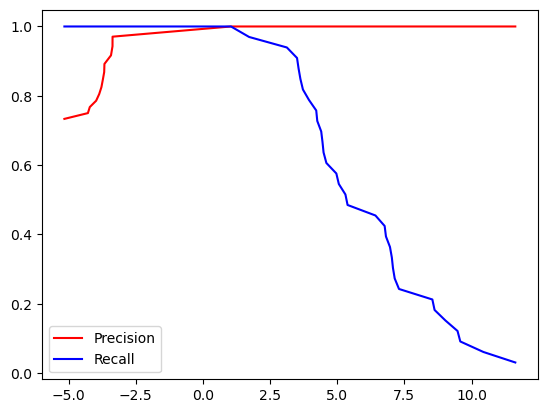

In [30]:
plt.plot(thresholds,precision_scores[:-1],c='r',label="Precision")
plt.plot(thresholds,recall_scores[:-1],c='b',label="Recall")
plt.legend()
plt.show()

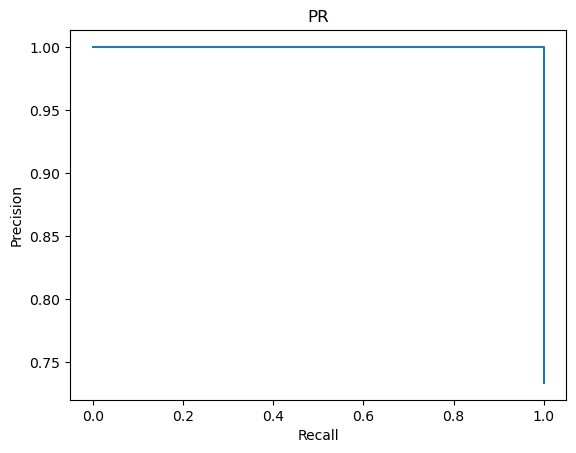

In [31]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR")
plt.show()

# ROC曲线

In [32]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,decision_scores)

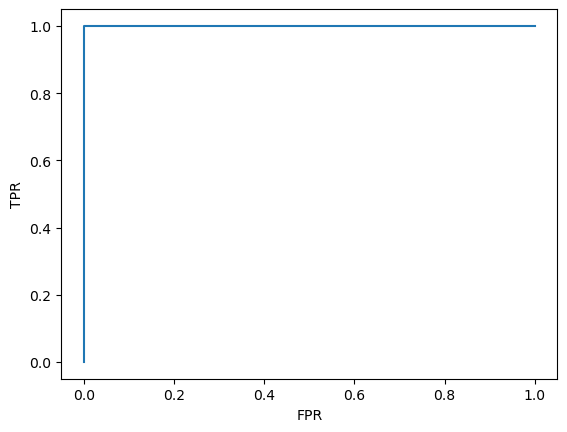

In [33]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# AUC(RUC曲线下的面积，面积越大，FPR越小时，TPR越大，正确率越高)

In [36]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,decision_scores)
auc

1.0